In [1]:
import os

assert os.environ['CONDA_DEFAULT_ENV']=='toi5671'

https://github.com/soichiro-hattori/unpopular/blob/master/intro-tess_cpm.ipynb

In [2]:
from astroquery.mast import Tesscut

In [3]:
from astroquery.mast.utils import parse_input_location
import os

def check_before_download(coordinates=None, size=5, sector=None, path=".", inflate=True, objectname=None, force_download=False):

    coords = parse_input_location(coordinates, objectname)
    ra = f"{coords.ra.value:.6f}"
    matched = [m for m in os.listdir(path) if ra in m]
    if (len(matched) != 0) and (force_download == False):
        print(f"Found the following FITS files in the \"{path}/\" directory with matching RA values.")
        print(matched)
        print("If you still want to download the file, set the \'force_download\' keyword to True.")
        return matched
    else:
        path_to_FFIs = Tesscut.download_cutouts(coordinates=coordinates, size=size, sector=sector, path=path, inflate=inflate, objectname=objectname)
        print(path_to_FFIs)
        return path_to_FFIs

In [4]:
path_to_FFIs = check_before_download(size=50, objectname="TIC 23863105", 
                                     force_download=True
                                    ) 

Inflating...
                        Local Path                       
---------------------------------------------------------
./tess-s0016-4-4_211.009466_38.618266_50x50_astrocut.fits
./tess-s0023-2-2_211.009466_38.618266_50x50_astrocut.fits
./tess-s0050-2-2_211.009466_38.618266_50x50_astrocut.fits


In [5]:
path_to_FFIs[0][0]

'./tess-s0016-4-4_211.009466_38.618266_50x50_astrocut.fits'

In [6]:
import sys

sys.path.insert(0, '/home/jp/github/research/project/toi5671/unpopular/')

In [7]:
import matplotlib.pyplot as plt
import tess_cpm
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams["figure.dpi"] = 100

s16 = tess_cpm.Source(path_to_FFIs[0][0], remove_bad=True)

Removing 3 bad data points (out of 1121) using the TESS provided QUALITY array


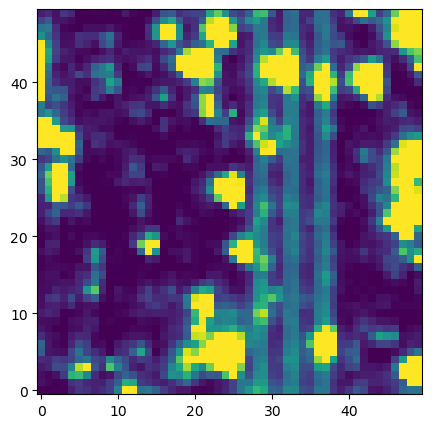

In [8]:
_ = s16.plot_cutout(l=10, h=90)

In [9]:
y1,y2=23, 29 
x1,x2=22, 28

s16.set_aperture(rowlims=[y1, y2], 
                 collims=[x1, x2]
                )

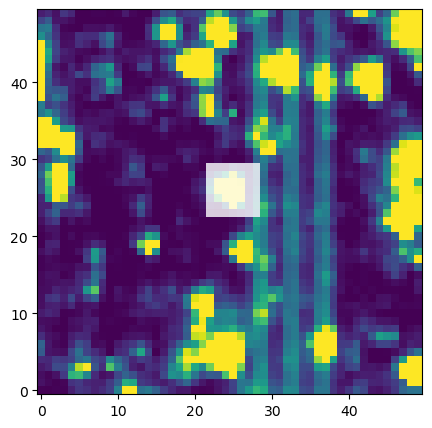

In [10]:
s16.plot_cutout(#rowlims=[y1, y2], 
                #collims=[x1, x2], 
                show_aperture=True, 
                l=10, h=90);

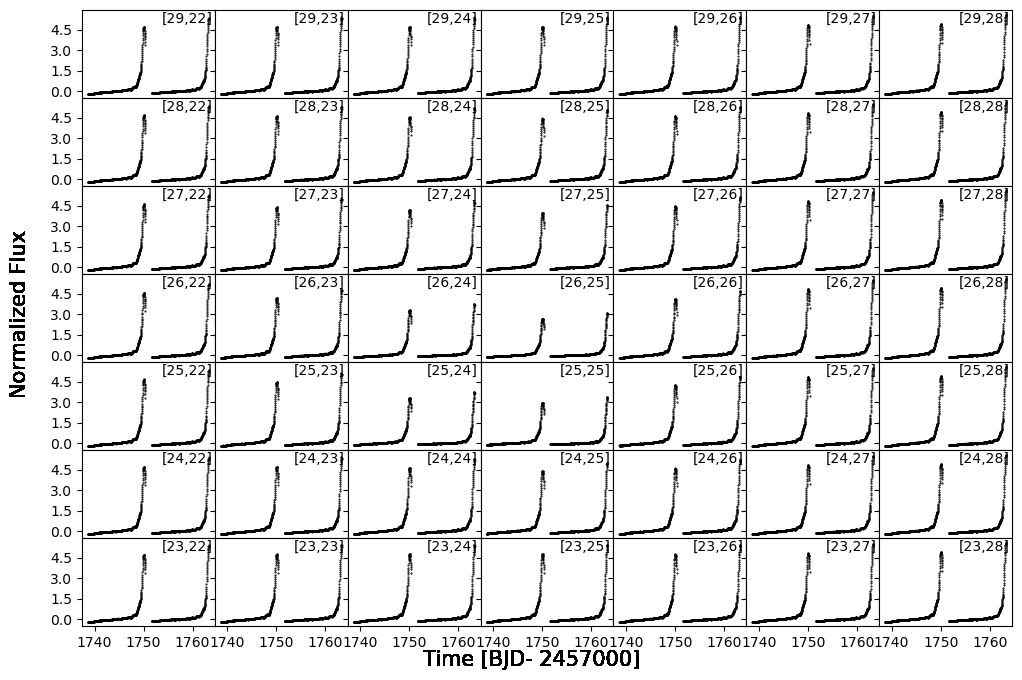

In [11]:
_ = s16.plot_pix_by_pix(data_type="normalized_flux")  

In [12]:
s16.add_cpm_model(exclusion_size=5, n=64, predictor_method="similar_brightness")

In [13]:
len(s16.models), len(s16.models[0])

(7, 7)

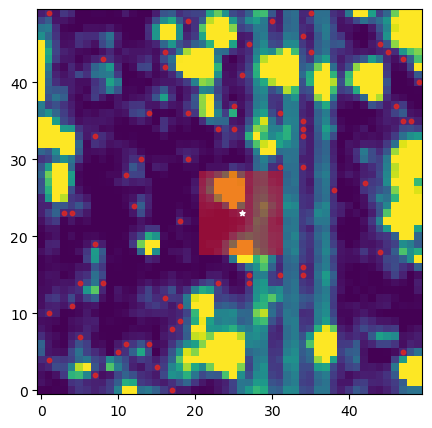

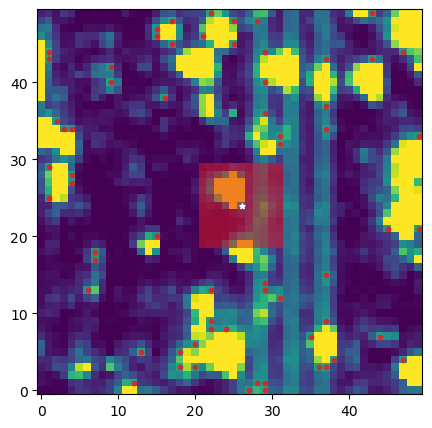

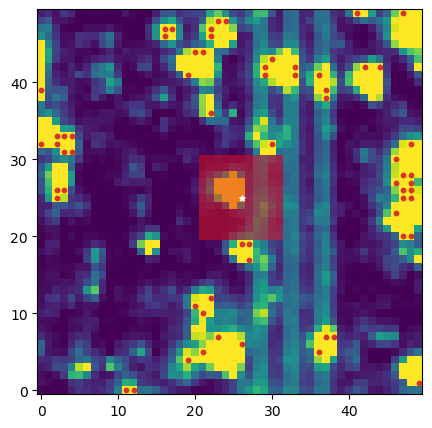

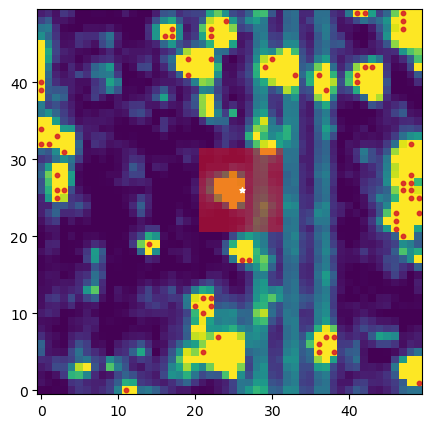

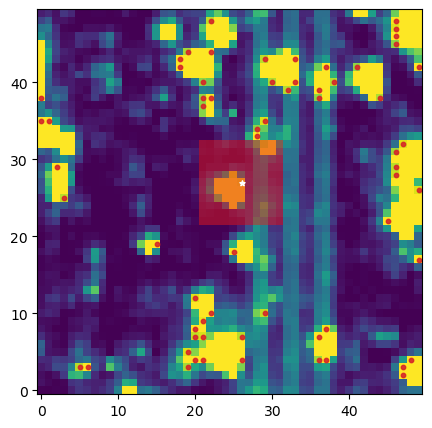

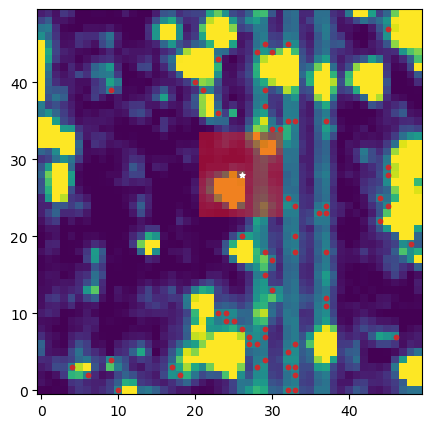

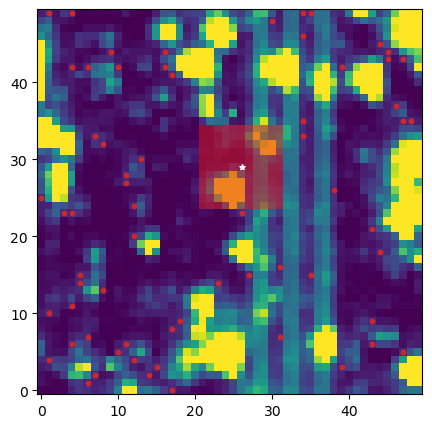

In [14]:
for sm in s16.models:
    _ = sm[4].plot_model(size_predictors=10)  # This method allows us to see our above choices

In [15]:
s16.set_regs([0.1])  # The regularization value(s) need to be passed as a list 

In [16]:
s16.holdout_fit_predict(k=100);

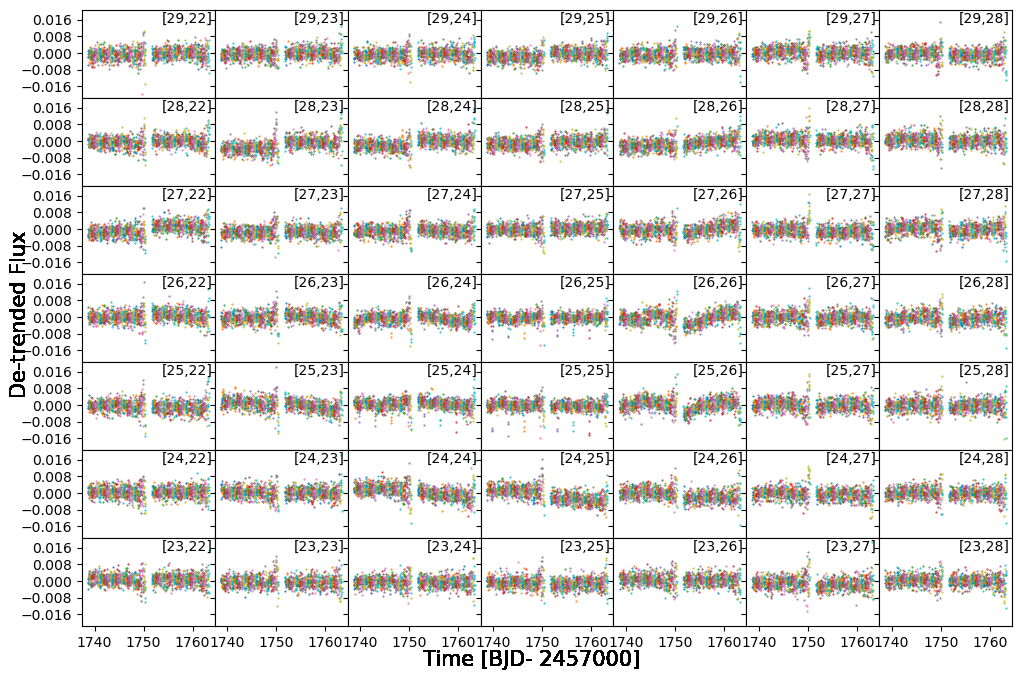

In [17]:
s16.plot_pix_by_pix(data_type="cpm_subtracted_flux", split=True);

Summing over 7 x 7 pixel lightcurves. Weighting=None
Summing over 7 x 7 pixel lightcurves. Weighting=median


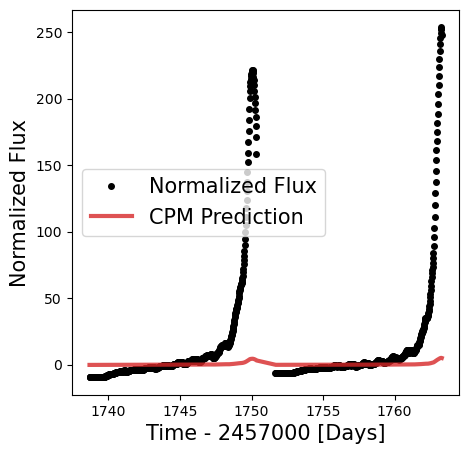

In [18]:
aperture_normalized_flux = s16.get_aperture_lc(data_type="normalized_flux")
aperture_cpm_prediction = s16.get_aperture_lc(data_type="cpm_prediction", weighting="median")
plt.plot(s16.time, aperture_normalized_flux, ".", c="k", ms=8, label="Normalized Flux")
plt.plot(s16.time, aperture_cpm_prediction, "-", lw=3, c="C3", alpha=0.8, label="CPM Prediction")
plt.xlabel("Time - 2457000 [Days]", fontsize=15)
plt.ylabel("Normalized Flux", fontsize=15)
plt.tick_params(labelsize=10)
plt.legend(fontsize=15)

Summing over 7 x 7 pixel lightcurves. Weighting=None


Text(0.5, 1.0, 'sector 16')

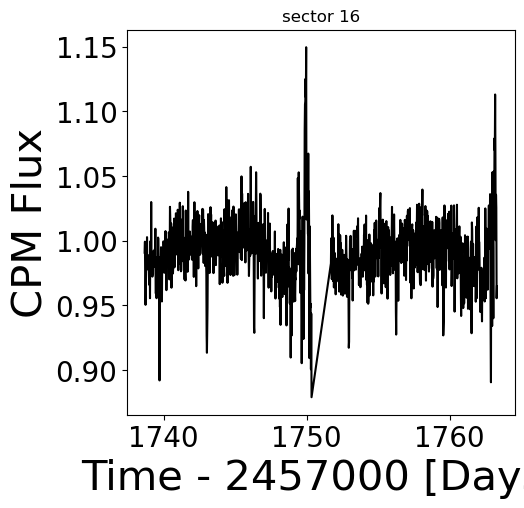

In [19]:
s16_apt_detrended_flux = s16.get_aperture_lc(data_type="cpm_subtracted_flux", weighting=None)
plt.plot(s16.time, s16_apt_detrended_flux+1, "k-")
# plt.plot(s.time, aperture_normalized_flux-aperture_cpm_prediction, "r.", alpha=0.2)  # Gives you the same light curve as the above line
plt.xlabel("Time - 2457000 [Days]", fontsize=30)
plt.ylabel("CPM Flux", fontsize=30)
plt.tick_params(labelsize=20)
plt.title("sector 16")

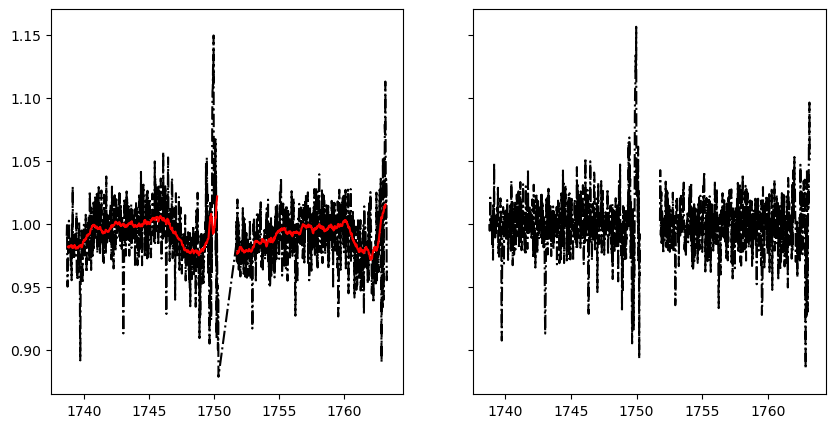

In [20]:
from wotan import flatten

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
ax = axs.flatten()

s16_apt_detrended_flux2, trend = flatten(s16.time, s16_apt_detrended_flux+1, 
                                         method="biweight", edge_cutoff=0.1,
                                         window_length=0.8, return_trend=True)
ax[0].plot(s16.time, s16_apt_detrended_flux+1, "k-.")
ax[0].plot(s16.time, trend, "r-")
ax[1].plot(s16.time, s16_apt_detrended_flux2, "k-.")

In [21]:
path_to_FFIs[1][0]

'./tess-s0023-2-2_211.009466_38.618266_50x50_astrocut.fits'

In [22]:
s23 = tess_cpm.Source(path_to_FFIs[1][0], remove_bad=True)

Removing 74 bad data points (out of 1238) using the TESS provided QUALITY array


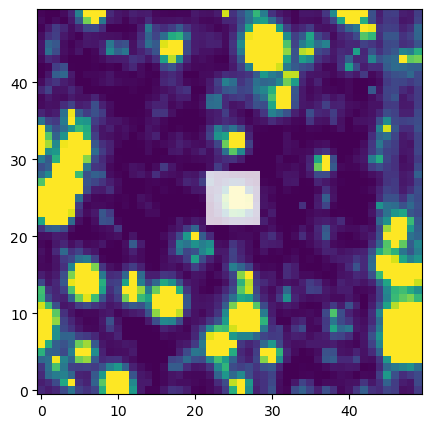

Summing over 7 x 7 pixel lightcurves. Weighting=None


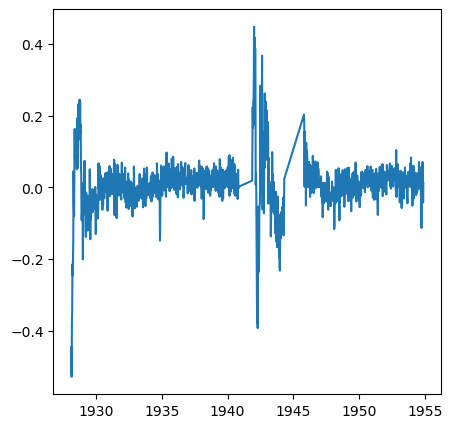

In [23]:
add_poly = False

y1, y2 = 22, 28
s23.set_aperture(rowlims=[y1, y2], 
                 collims=[x1, x2])
s23.plot_cutout(#rowlims=[y1, y2], 
                #collims=[x1, x2], 
                show_aperture=True, l=10, h=90);
s23.add_cpm_model(exclusion_size=3, n=64, predictor_method="similar_brightness")
if add_poly:
    s23.add_poly_model(scale=2, num_terms=4) #cubic
    s23.set_regs([0.01, 0.1])
else:
    s23.set_regs([0.1])  # The regularization value(s) need to be passed as a list 
s23.holdout_fit_predict(k=100);
   
plt.plot(s23.time, s23.get_aperture_lc(data_type="cpm_subtracted_flux"))
if add_poly:
    plt.plot(s23.time, s23.get_aperture_lc(data_type="poly_model_prediction"))

Summing over 7 x 7 pixel lightcurves. Weighting=None


Text(0.5, 1.0, 'sector 23')

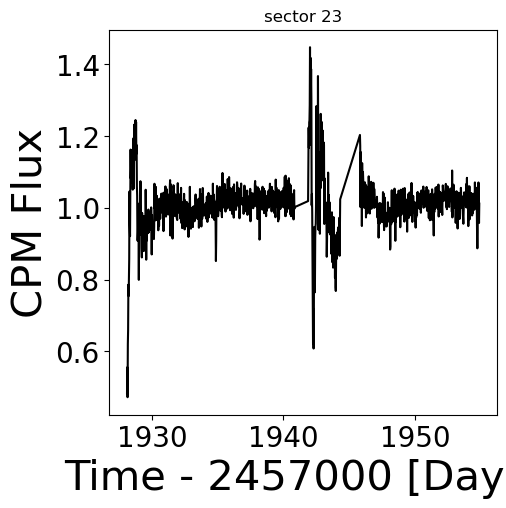

In [24]:
s23_apt_detrended_flux = s23.get_aperture_lc(data_type="cpm_subtracted_flux", weighting=None)
plt.plot(s23.time, s23_apt_detrended_flux+1, "k-")
# plt.plot(s.time, aperture_normalized_flux-aperture_cpm_prediction, "r.", alpha=0.2)  # Gives you the same light curve as the above line
plt.xlabel("Time - 2457000 [Days]", fontsize=30)
plt.ylabel("CPM Flux", fontsize=30)
plt.tick_params(labelsize=20)
plt.title("sector 23")

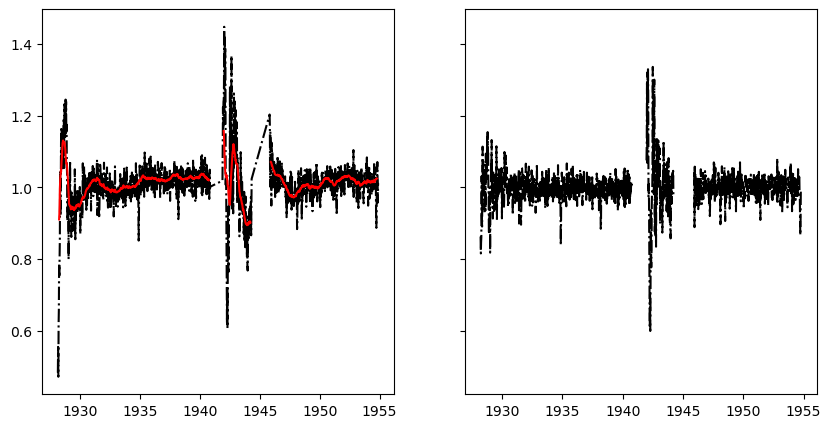

In [25]:
from wotan import flatten

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
ax = axs.flatten()

s23_apt_detrended_flux2, trend = flatten(s23.time, s23_apt_detrended_flux+1, 
                                         method="biweight", edge_cutoff=0.1,
                                         window_length=0.6, return_trend=True)
ax[0].plot(s23.time, s23_apt_detrended_flux+1, "k-.")
ax[0].plot(s23.time, trend, "r-")
ax[1].plot(s23.time, s23_apt_detrended_flux2, "k-.")

In [26]:
s50 = tess_cpm.Source(path_to_FFIs[2][0], remove_bad=True)

Removing 1209 bad data points (out of 3623) using the TESS provided QUALITY array


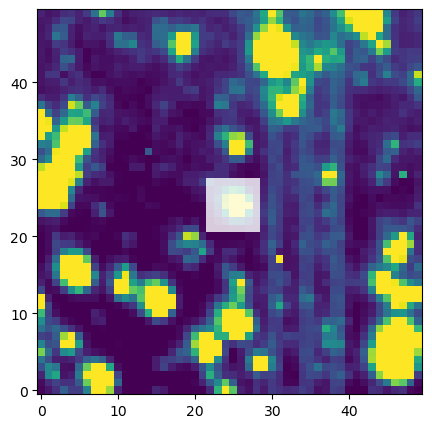

In [27]:
add_poly = False

y1, y2 = 21, 27
s50.set_aperture(rowlims=[y1, y2], 
                 collims=[x1, x2])
_ = s50.plot_cutout(#rowlims=[y1, y2], 
                    #collims=[x1, x2], 
                    show_aperture=True, 
                    l=10, h=90);
s50.add_cpm_model(exclusion_size=5, n=64, predictor_method="similar_brightness")
if add_poly:
    s50.add_poly_model(scale=2, num_terms=4)
    s50.set_regs([0.01, 0.1])
else:
    s50.set_regs([0.1])  # The regularization value(s) need to be passed as a list 
s50.holdout_fit_predict(k=100);

Summing over 7 x 7 pixel lightcurves. Weighting=None


Text(0.5, 1.0, 'sector 50')

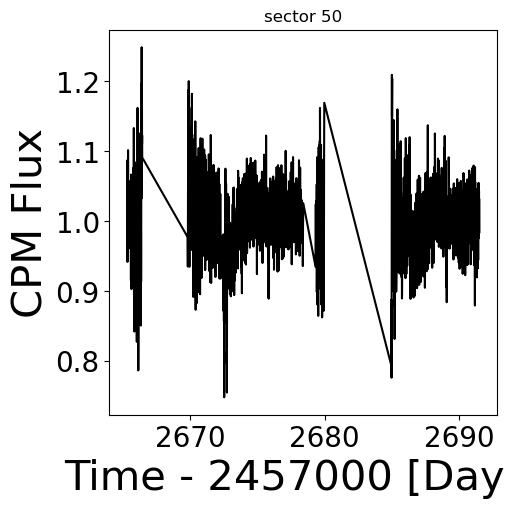

In [28]:
s50_apt_detrended_flux = s50.get_aperture_lc(data_type="cpm_subtracted_flux", weighting=None)
plt.plot(s50.time, s50_apt_detrended_flux+1, "k-")
# plt.plot(s.time, aperture_normalized_flux-aperture_cpm_prediction, "r.", alpha=0.2)  # Gives you the same light curve as the above line
plt.xlabel("Time - 2457000 [Days]", fontsize=30)
plt.ylabel("CPM Flux", fontsize=30)
plt.tick_params(labelsize=20)
plt.title("sector 50")

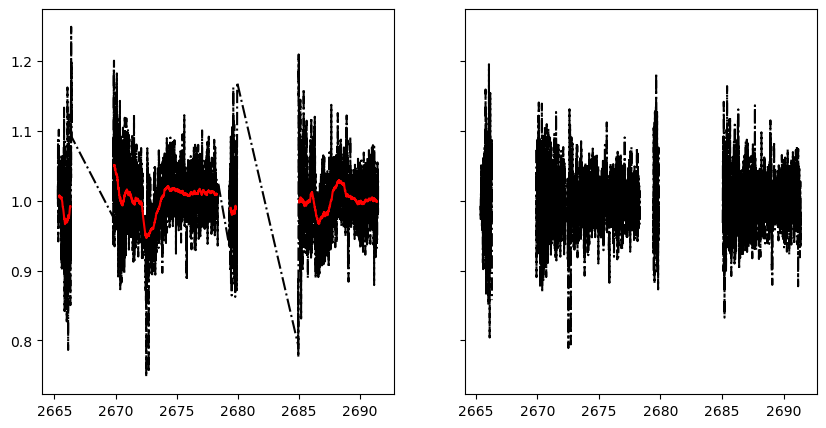

In [29]:
from wotan import flatten

fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
ax = axs.flatten()

s50_apt_detrended_flux2, trend = flatten(s50.time, s50_apt_detrended_flux+1, 
                                         method="biweight", edge_cutoff=0.1,
                                         window_length=0.6, return_trend=True)
ax[0].plot(s50.time, s50_apt_detrended_flux+1, "k-.")
ax[0].plot(s50.time, trend, "r-")
ax[1].plot(s50.time, s50_apt_detrended_flux2, "k-.")

In [30]:
import numpy as np

np.diff(s16.time)*24*60

array([29.97070312, 30.05859375, 29.97070312, ..., 29.97070312,
       30.05859375, 29.97070312])

In [31]:
np.diff(s23.time)*24*60

array([29.97070312, 30.05859375, 29.97070312, ..., 29.97070312,
       30.05859375, 29.97070312])

In [32]:
np.diff(s50.time)*24*60

array([9.99998437, 9.99998403, 9.9999837 , ..., 9.99974766, 9.99974732,
       9.99974665])

In [33]:
from aesthetic.plot import savefig, set_style
set_style('science')

Text(0.5, 1.0, 'Sector 50')

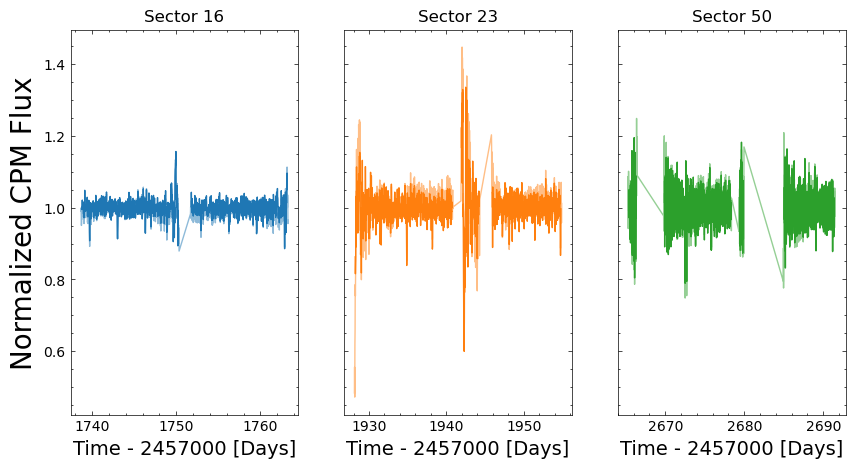

In [35]:
fig, axs = plt.subplots(1,3, figsize=(10, 5), sharey=True)
ax = axs.flatten()
ax[0].plot(s16.time, s16_apt_detrended_flux+1, c="C0", label="Sector 16", alpha=0.5)
ax[0].plot(s16.time, s16_apt_detrended_flux2, c="C0", label="Sector 16")
ax[1].plot(s23.time, s23_apt_detrended_flux+1, c="C1", label="Sector 23", alpha=0.5)
ax[1].plot(s23.time, s23_apt_detrended_flux2, c="C1", label="Sector 23")
ax[2].plot(s50.time, s50_apt_detrended_flux+1, c="C2", label="Sector 50", alpha=0.5)
ax[2].plot(s50.time, s50_apt_detrended_flux2, c="C2", label="Sector 50")

ax[0].set_xlabel("Time - 2457000 [Days]", fontsize=14)
ax[1].set_xlabel("Time - 2457000 [Days]", fontsize=14)
ax[2].set_xlabel("Time - 2457000 [Days]", fontsize=14)
ax[0].set_ylabel("Normalized CPM Flux", fontsize=20)
ax[0].set_title("Sector 16")
ax[1].set_title("Sector 23")
ax[2].set_title("Sector 50")

In [36]:
import pandas as pd

# for s,sector in zip([s16,s23,s50],[16,23,50]):
df1 = pd.DataFrame(np.c_[s16.time+2457000, 
                   s16_apt_detrended_flux2,
                   np.ones_like(s16.time)+np.nanstd(s16_apt_detrended_flux2)], 
             columns=['time','flux','err']
            ).dropna()
df2 = pd.DataFrame(np.c_[s23.time+2457000, 
                   s23_apt_detrended_flux2,
                   np.ones_like(s23.time)+np.nanstd(s23_apt_detrended_flux2)], 
             columns=['time','flux','err']
            ).dropna()
df3 = pd.DataFrame(np.c_[s50.time+2457000, 
                   s50_apt_detrended_flux2,
                   np.ones_like(s50.time)+np.nanstd(s50_apt_detrended_flux2)], 
             columns=['time','flux','err']
            ).dropna()
df1, df2, df3

(              time      flux       err
 5     2.458739e+06  0.999975  1.023056
 6     2.458739e+06  0.994739  1.023056
 7     2.458739e+06  1.001697  1.023056
 8     2.458739e+06  1.021017  1.023056
 9     2.458739e+06  0.996665  1.023056
 ...            ...       ...       ...
 1108  2.458763e+06  1.012848  1.023056
 1109  2.458763e+06  1.063546  1.023056
 1110  2.458763e+06  1.056010  1.023056
 1111  2.458763e+06  1.096385  1.023056
 1112  2.458763e+06  1.050527  1.023056
 
 [1098 rows x 3 columns],
               time      flux       err
 5     2.458928e+06  0.862797  1.051802
 6     2.458928e+06  0.815698  1.051802
 7     2.458928e+06  0.847140  1.051802
 8     2.458928e+06  0.861048  1.051802
 9     2.458928e+06  1.031183  1.051802
 ...            ...       ...       ...
 1154  2.458955e+06  0.974753  1.051802
 1155  2.458955e+06  0.900137  1.051802
 1156  2.458955e+06  0.866912  1.051802
 1157  2.458955e+06  0.909734  1.051802
 1158  2.458955e+06  0.996764  1.051802
 
 [1134 row

In [37]:
df = pd.concat([df1,df2,df3], axis=0)

In [3]:
df.to_csv('../data/tess_cpm_s16s23s50.csv', index=False)

In [38]:
df.to_csv('../allesfitter/tess/s16s23s50/tess.csv', index=False, header=False)

In [1]:
import pandas as pd

df = pd.read_csv('../allesfitter/tess/s16s23s50/tess.csv', names=['time', 'flux', 'err'])
df

,time,flux,err
0,2.458739e+06,0.999975,1.023056
1,2.458739e+06,0.994739,1.023056
2,2.458739e+06,1.001697,1.023056
3,2.458739e+06,1.021017,1.023056
4,2.458739e+06,0.996665,1.023056
...,...,...,...
4521,2.459691e+06,0.974642,1.043681
4522,2.459691e+06,0.964362,1.043681
4523,2.459691e+06,0.986430,1.043681
4524,2.459691e+06,0.932942,1.043681


In [3]:
from transitleastsquares import transitleastsquares

tls = transitleastsquares(df.time.values, df.flux.values, df.err.values)
tls_results = tls.power(period_max=10)

Transit Least Squares TLS 1.0.31 (22 Nov 2021)
Creating model cache for 36 durations
Searching 4526 data points, 81684 periods from 0.602 to 10.0 days
Using all 8 CPU threads


100%|████████████████████████████████████████| 81684/81684 periods | 02:41<00:00


Searching for best T0 for period 3.30787 days


/home/jp/miniconda3/envs/toi5671/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/jp/miniconda3/envs/toi5671/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/jp/miniconda3/envs/toi5671/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/jp/miniconda3/envs/toi5671/lib/python3.11/site-packages/transitleastsquares/main.py:411: UserWarning: 282 of 288 transits without data. The true period may be twice the given period.
  warnings.warn(text)


In [10]:
tls_results.keys()

dict_keys(['SDE', 'SDE_raw', 'chi2_min', 'chi2red_min', 'period', 'period_uncertainty', 'T0', 'duration', 'depth', 'depth_mean', 'depth_mean_even', 'depth_mean_odd', 'transit_depths', 'transit_depths_uncertainties', 'rp_rs', 'snr', 'snr_per_transit', 'snr_pink_per_transit', 'odd_even_mismatch', 'transit_times', 'per_transit_count', 'transit_count', 'distinct_transit_count', 'empty_transit_count', 'FAP', 'in_transit_count', 'after_transit_count', 'before_transit_count', 'periods', 'power', 'power_raw', 'SR', 'chi2', 'chi2red', 'model_lightcurve_time', 'model_lightcurve_model', 'model_folded_phase', 'folded_y', 'folded_dy', 'folded_phase', 'model_folded_model'])

In [15]:
tls_results['period'], tls_results['period_uncertainty'], tls_results['T0']

(3.3078672409037155, 0.00026081271484801327, 2458739.7076258925)

(-0.1, 0.1)

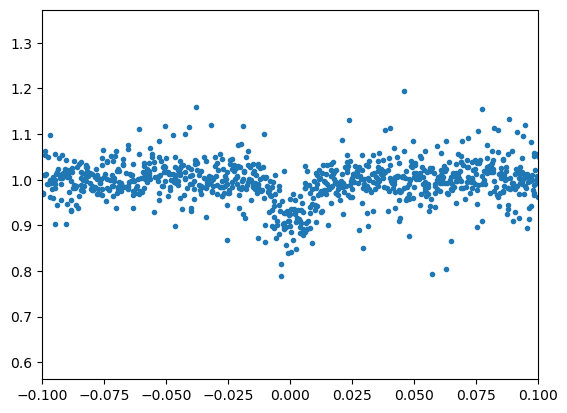

In [9]:
import matplotlib.pyplot as pl

pl.plot(tls_results['folded_phase']-0.5, tls_results['folded_y'], '.')
pl.xlim(-0.1,0.1)

In [17]:
import lightkurve as lk

In [18]:
res_lc = lk.search_lightcurve(f'TIC 23863105')
res_lc

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 50,2022,QLP,600,23863105,0.0
1,TESS Sector,2019,DIAMANTE,1800,23863106,0.0


/home/jp/miniconda3/envs/toi5671/lib/python3.11/site-packages/lightkurve/lightcurve.py:1131: LightkurveWarning: The light curve appears to be zero-centered (median=1.00e+00 +/- 1.00e+02); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(


<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

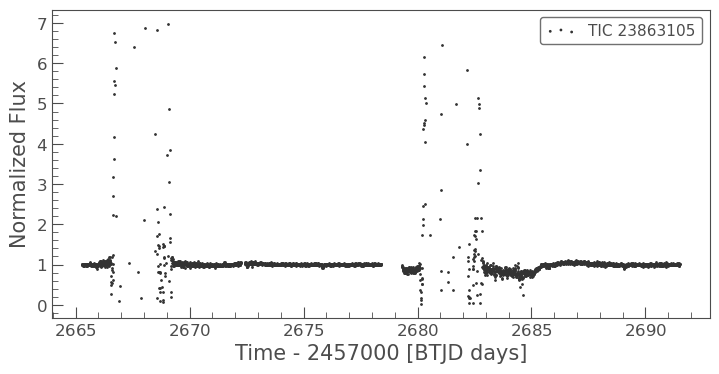

In [19]:
lc_qlp = res_lc[0].download().normalize().remove_outliers()
lc_qlp.scatter()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

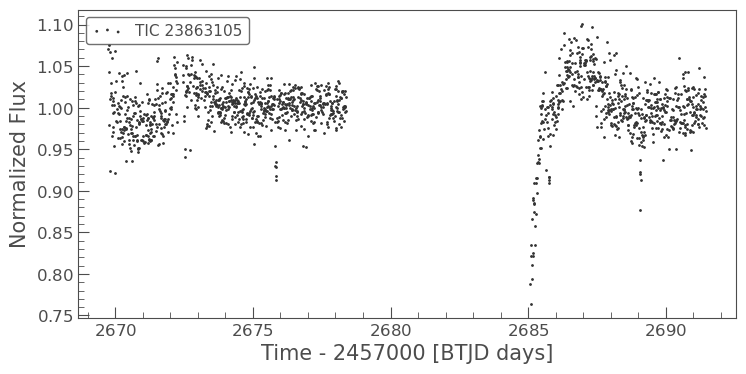

In [24]:
lc_qlp[lc_qlp.quality==0].scatter()

In [61]:
res_tpf = lk.search_targetpixelfile(f'TIC 23863105')
res_tpf

SearchResult containing 0 data products.